<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


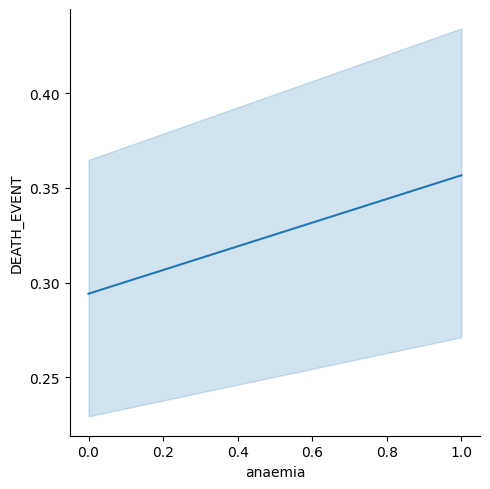

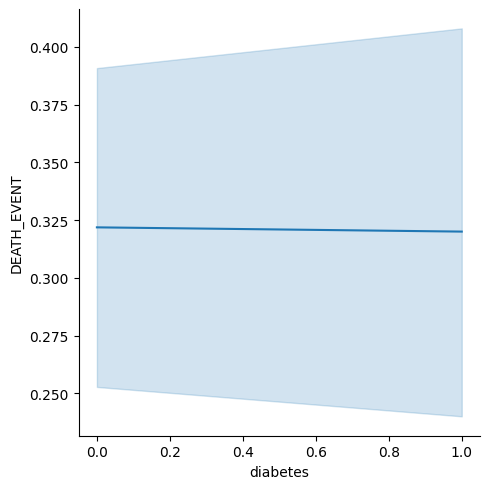

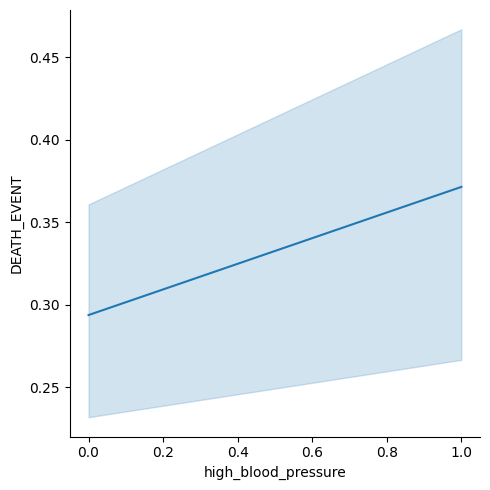

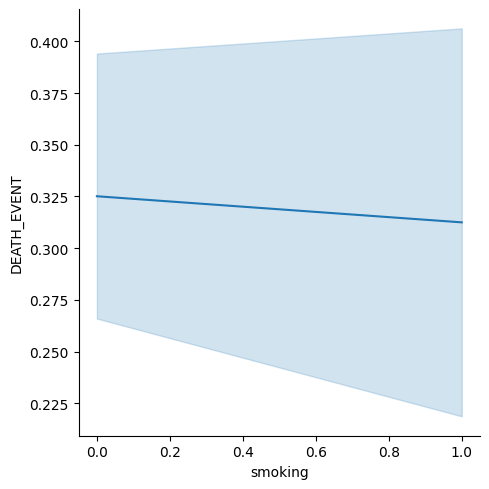

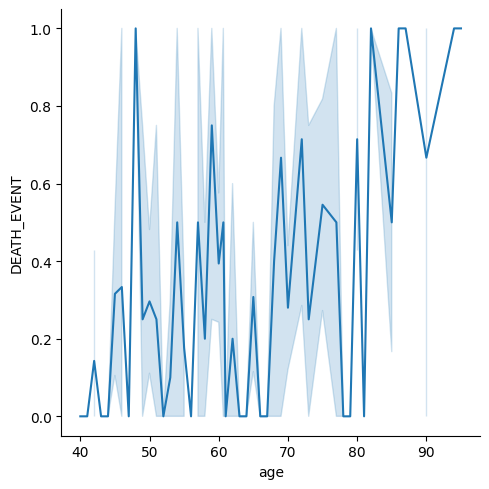

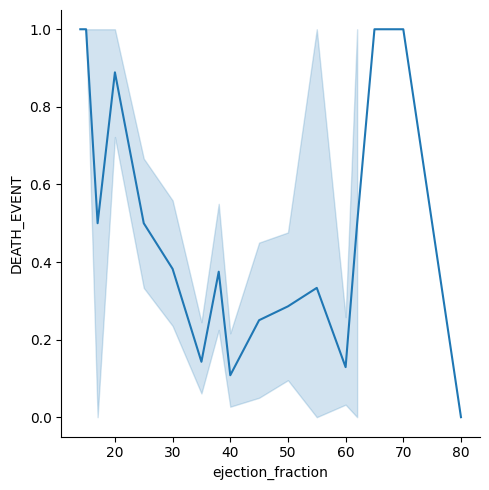

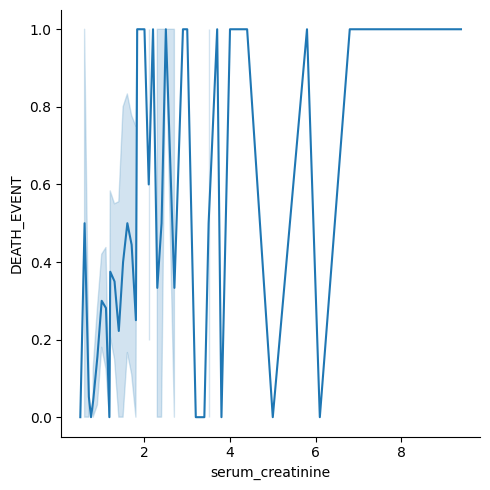

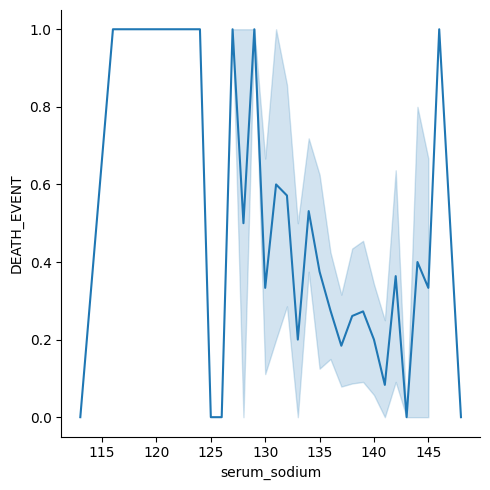

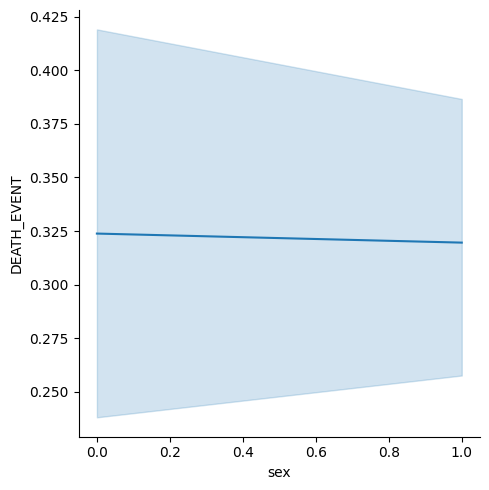

Accuracy: 0.7333333333333333
Cross-Validation Scores: [0.76666667 0.7        0.83333333 0.76666667 0.83333333 0.9
 0.9        0.8        0.8        0.86206897]
Average Cross-Validation Score: 0.8162068965517241
En İyi Modell: LogisticRegression(C=0.001, solver='liblinear')
En İyi Parametreler: {'C': 0.001, 'solver': 'liblinear'}
En İyi Skor: 0.786634514313182
Accuracy (En İyi Hiperparametre): 0.7333333333333333
Confusion Matrix (En İyi Hiperparametre):
 [[33  2]
 [14 11]]
Classification Report (En iyi Hiperparametre):
               precision    recall  f1-score   support

           0       0.70      0.94      0.80        35
           1       0.85      0.44      0.58        25

    accuracy                           0.73        60
   macro avg       0.77      0.69      0.69        60
weighted avg       0.76      0.73      0.71        60

ROC AUC Score: 0.5
Mean Squared Error: 0.26666666666666666
Mean Absolute Error: 0.26666666666666666


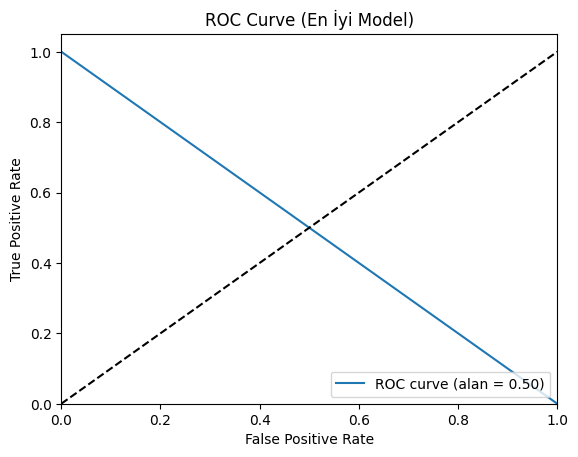

In [9]:
from re import M
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV



#Kalp Krizi geçiren 299 hastanın 13 feature (özelliğe) göre toplanmış verilerini içeren veri seti
veri = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")


#Verimizde eksik ya da yanlış etiketlenmiş bir veri olup olmadığını kontrol etmek için ilgili pandas fonksiyonlarını kullanıyoruz
veri.info()

veri.describe()

veri.isnull().sum()

veri.shape

veri.head(10)

#Hangi değişkenlerin kalp krizi sonucu ölümü tetikleyebileceğinin tahmini ve uygun parametrelerin tespiti için ölüm oranları ile parametrelerin relation (alaka) grafiklerinin çizimi
sns.relplot(x="anaemia", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="diabetes", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="high_blood_pressure", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="smoking", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="age", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="ejection_fraction", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="serum_creatinine", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="serum_sodium", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="sex", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

#Uygun feature'lar tespit edildikten sonra makine öğrenmesi modeline uygun şekilde besleme yapılabilmesi için feature'ları binary ve continous olarak listelere ayırıyoruz

binary_features = ["anaemia", "diabetes", "high_blood_pressure", "smoking"]
continuous_features = ["age", "ejection_fraction", "serum_creatinine", "serum_sodium"]

#Continous feature'ların preprocessing'i için StandardScaler fonksiyonunu kullanarak Data Normalization yapıyoruz.
scaler = StandardScaler()
veri[continuous_features] = scaler.fit_transform(veri[continuous_features])

#Aynı işlemi binary feature'lar için gerçekleştiriyoruz.
encoder = OneHotEncoder(sparse=False, drop="first", min_frequency=True)
veri[binary_features] = encoder.fit_transform(veri[binary_features])

#Feature ve target değişkenlerini x ve y olarak kodluyoruz. X değişkeninden target değişkenini çıkarıyoruz ki değerler üst üste binerek yanlış tahminde bulunmaya neden olmasın.
X = veri.drop("DEATH_EVENT", axis=1)
y = veri["DEATH_EVENT"]

#Feature ve target değişkenlerimizi test edebilmek ve overfitting'in önüne geçmek için dağıtıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Bu problem için en yüksek skoru veren model olan Logistic Regression modelini kullanıyoruz
model = sklearn.linear_model.LogisticRegression()
#Hyperparameter tuning için GridSearchCV modülünü kullanacağız. Bunun için şimdiden optimize edilecek parametrelerin listesini hazırlıyoruz.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Cross Validation yaparak modelin diğer modeller içerisindeki en iyi aday olup olmadığını doğruluyoruz.
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv)

print("Cross-Validation Scores:", scores)
print("Average Cross-Validation Score:", scores.mean())

scoring = "f1_macro"

#Şimdi GridSearch ile hyperparameter oprimizasyonunu için modeli train ediyoruz
grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"En İyi Modell: {best_model}")
print(f"En İyi Parametreler: {best_params}")
print(f"En İyi Skor: {best_score}")

#GridSearch'in verdiği raporlar neticesinde önerdiği parametreler ile tekrardan modeli çalıştırıyoruz.
y_pred = best_model.predict(X_test)

accuracy_hyper = accuracy_score(y_test, y_pred)
print("Accuracy (En İyi Hiperparametre):", accuracy)

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (En İyi Hiperparametre):\n", confusion_matrix)

classification_report = classification_report(y_test, y_pred)
print("Classification Report (En iyi Hiperparametre):\n", classification_report)

#Son olarak Roc curve metriklerinin grafiği ve MSE, MAE sonuçları ile classification ve regression performansını da ölçüyoruz.
pr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr = 1 - tpr
roc_auc = auc(fpr, tpr)

print("ROC AUC Score:", roc_auc)
mean_squared_error = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_squared_error)
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (alan = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (En İyi Model)')
plt.legend(loc="lower right")
plt.show()






